In [5]:
pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     ----- ------------------------------- 41.0/282.6 kB 991.0 kB/s eta 0:00:01
     -------------------- ----------------- 153.6/282.6 kB 1.8 MB/s eta 0:00:01
     -------------------------------------  276.5/282.6 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 282.6/282.6 kB 2.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


   Age  WaistCirc   BMI
0   22       81.0  23.3
1   44       80.1  23.2
2   21       69.6  20.1
3   43      120.4  33.3
4   51       81.1  20.1
Age          0
WaistCirc    0
BMI          0
dtype: int64


C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_i

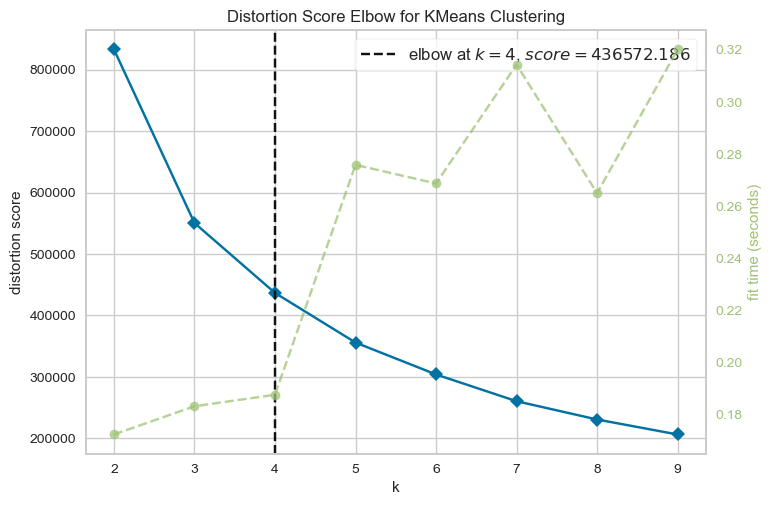

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but KMeans was fitted with feature names



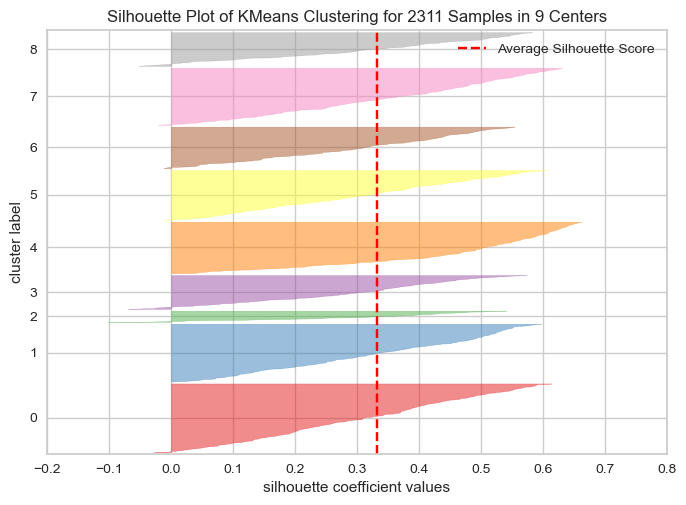

C:\Users\Home\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import plotly.graph_objects as go
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

data = pd.read_csv("Metabolic Syndrome.csv", 
                   usecols=["Age", "WaistCirc", "BMI"])
data.dropna(inplace=True)
print(data.head())
print(data.isnull().sum())

# Инициализация модели k-means
model = KMeans()
# Визуализация правила локтя для определения оптимального количества кластеров
elbow_visualizer = KElbowVisualizer(model, k=(2,10))
elbow_visualizer.fit(data[['Age', 'WaistCirc', 'BMI']])
elbow_visualizer.show()

# Визуализация коэффициента силуэта для определения оптимального количества кластеров
silhouette_visualizer = SilhouetteVisualizer(model, k=(2,10))
silhouette_visualizer.fit(data[['Age', 'WaistCirc', 'BMI']])
silhouette_visualizer.show()

kmeans = KMeans(n_clusters= 4, random_state=123, init='k-means++')
kmeans.fit(data)
kmeans.cluster_centers_
labels = kmeans.labels_
data['Claster'] = labels
data['Claster'].value_counts()
fig = go.Figure(data=[go.Scatter3d(x=data['Age'],y = data['WaistCirc'],z = data['BMI'],
                                   mode='markers', marker_color=data['Claster'], marker_size = 4)])
fig.show()

   Age  WaistCirc   BMI
0   22       81.0  23.3
1   44       80.1  23.2
2   21       69.6  20.1
3   43      120.4  33.3
4   51       81.1  20.1
Age          0
WaistCirc    0
BMI          0
dtype: int64


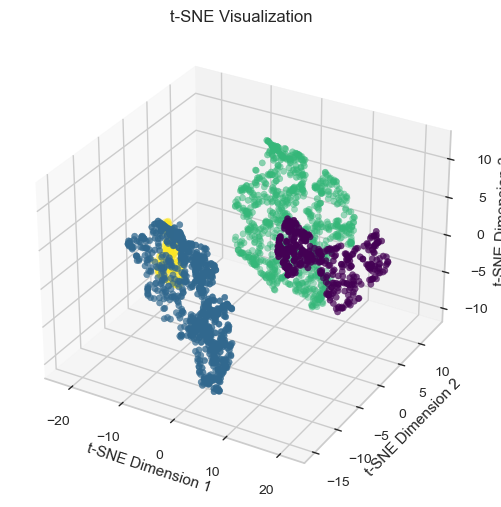

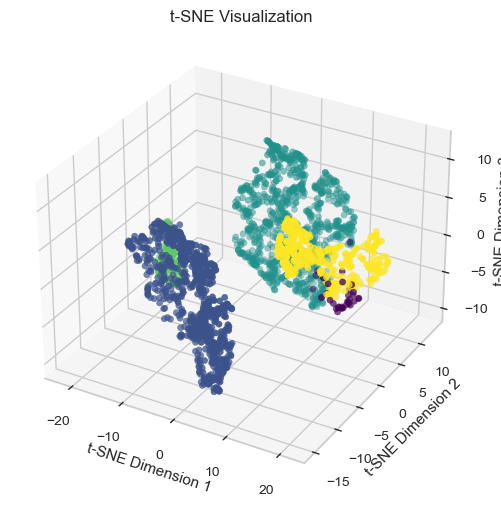

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import umap

data = pd.read_csv("Metabolic Syndrome.csv", 
                   usecols=["Age", "WaistCirc", "BMI"])
data.dropna(inplace=True)
print(data.head())
print(data.isnull().sum())

#Для алгоритма иерархической кластеризации
# Расчет матрицы расстояний
dist_matrix = linkage(data.values, method='ward', metric='euclidean')
# Построение дендрограммы
"""plt.figure(figsize=(10, 6))
dend = dendrogram(dist_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance')
plt.show()"""
X = data[['Age', 'WaistCirc', 'BMI']]
agglomerative = AgglomerativeClustering(n_clusters=4, compute_distances=True)
agg = agglomerative.fit(X)
data['Claster']=agg.labels_
fig = go.Figure(data=[go.Scatter3d(x=data['Age'],y = data['WaistCirc'],z = data['BMI'],
                                   mode='markers', marker_color=data['Claster'], marker_size = 4)])
fig.show()
#Для DBSCAN
# Нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Кластеризация с помощью DBSCAN
dbscan = DBSCAN(eps= 0.5, min_samples=5).fit(X)
labels = dbscan.fit_predict(scaled_data)
fig = go.Figure(data=[go.Scatter3d(x=data['Age'],y = data['WaistCirc'],z = data['BMI'],
                                   mode='markers', marker_color=labels, marker_size = 4)])
fig.show()

# Преобразование данных с помощью t-SNE
tsne = TSNE(n_components=3)
tsne_data = tsne.fit_transform(scaled_data)

# Визуализация данных t-SNE для алгоритма иерархической кластеризации
fig1 = plt.figure(figsize=(8, 6))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(tsne_data[:, 0], tsne_data[:, 1], tsne_data[:, 2], c=data['Claster'], cmap='viridis')
ax1.set_title('t-SNE Visualization')
ax1.set_xlabel('t-SNE Dimension 1')
ax1.set_ylabel('t-SNE Dimension 2')
ax1.set_zlabel('t-SNE Dimension 3')

plt.show()
# Визуализация данных t-SNE для DBSCAN
fig2 = plt.figure(figsize=(8, 6))
ax2 = fig2.add_subplot(111, projection='3d')
ax2.scatter(tsne_data[:, 0], tsne_data[:, 1], tsne_data[:, 2], c=labels, cmap='viridis')
ax2.set_title('t-SNE Visualization')
ax2.set_xlabel('t-SNE Dimension 1')
ax2.set_ylabel('t-SNE Dimension 2')
ax2.set_zlabel('t-SNE Dimension 3')

plt.show()

In [ ]:
#Черновик

#Для алгоритма иерархической кластеризации
# Расчет матрицы расстояний
dist_matrix = linkage(data.values, method='ward', metric='euclidean')
# Построение дендрограммы
"""plt.figure(figsize=(10, 6))
dend = dendrogram(dist_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.ylabel('Distance')
plt.show()"""
X = data[['Age', 'WaistCirc', 'BMI']]
agglomerative = AgglomerativeClustering(n_clusters=4, compute_distances=True)
agg = agglomerative.fit(X)
data['Claster']=agg.labels_
fig = go.Figure(data=[go.Scatter3d(x=data['Age'],y = data['WaistCirc'],z = data['BMI'],
                                   mode='markers', marker_color=data['Claster'], marker_size = 4)])
fig.show()



# Преобразование данных с помощью t-SNE
tsne = TSNE(n_components=3)
tsne_data = tsne.fit_transform(scaled_data)

# Визуализация данных
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_data[:, 0], tsne_data[:, 1], tsne_data[:, 2], c=labels, cmap='viridis')
ax.set_title('t-SNE Visualization')
ax.set_xlabel('t-SNE Dimension 1')
ax.set_ylabel('t-SNE Dimension 2')
ax.set_zlabel('t-SNE Dimension 3')

plt.show()

reducer = umap.UMAP()
X_umap = reducer.fit_transform(data)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=agglomerative.labels_, cmap='viridis')
plt.title('Hierarchical Clustering with UMAP')
plt.show()